In [1]:
import multimodal_cci as mmcci

2024-07-12 11:39:50.662636: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI AVX512_BF16 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-07-12 11:39:51.671174: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-07-12 11:39:52.195739: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-07-12 11:39:52.195783: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc

In [2]:
import pickle

with open('../data/melanoma_data.pkl', 'rb') as f:
    melanoma_data = pickle.load(f)

In [3]:
from matplotlib import pyplot as plt

colors = {
    'Endothelial': plt.colormaps.get_cmap('tab20').colors[0],
    'Fibroblast': plt.colormaps.get_cmap('tab20').colors[1],
    'KC Differentiating': plt.colormaps.get_cmap('tab20').colors[2],
    'KC Cycling': plt.colormaps.get_cmap('tab20').colors[3],
    'KC Basal': plt.colormaps.get_cmap('tab20').colors[4],
    'KC Other': plt.colormaps.get_cmap('tab20').colors[5],
    'NK + T': plt.colormaps.get_cmap('tab20').colors[6],
    'B + PDC': plt.colormaps.get_cmap('tab20').colors[7],
    'Melanocyte': plt.colormaps.get_cmap('tab20').colors[8],
    'Myeloid': plt.colormaps.get_cmap('tab20').colors[9],
    'Pilosebaceous': plt.colormaps.get_cmap('tab20').colors[10],
    'NotDet': plt.colormaps.get_cmap('tab20').colors[11],
}

In [4]:
cell_type_replacements = {
    'KC.Basal': 'KC Basal',
    'KC_Basal': 'KC Basal',
    'KC.Cycling': 'KC Cycling',
    'KC_Cyc': 'KC Cycling',
    'KC_Diff': 'KC Differentiating',
    'KC_Other': 'KC Other',
    'NK.T': 'NK + T',
    'B.PDC': 'B + PDC',
    'B...PDC': 'B + PDC',
}

visium_cci = [mmcci.tl.rename_celltypes(sample, cell_type_replacements) for sample in melanoma_data['visium_cci']]
cosmx_cci = [mmcci.tl.rename_celltypes(sample, cell_type_replacements) for sample in melanoma_data['cosmx_cci']]
xenium_cci = [mmcci.tl.rename_celltypes(sample, cell_type_replacements) for sample in melanoma_data['xenium_cci']]

visium_pvals = [mmcci.tl.rename_celltypes(sample, cell_type_replacements) for sample in melanoma_data['visium_pvals']]
cosmx_pvals = [mmcci.tl.rename_celltypes(sample, cell_type_replacements) for sample in melanoma_data['cosmx_pvals']]
xenium_pvals = [mmcci.tl.rename_celltypes(sample, cell_type_replacements) for sample in melanoma_data['xenium_pvals']]

#### Normalise each group of samples

In [5]:
visium_normalised = mmcci.it.normalise_within_tech(visium_cci, melanoma_data['visium_sizes'])
xenium_normalised = mmcci.it.normalise_within_tech(xenium_cci, melanoma_data['xenium_sizes'])
cosmx_normalised = mmcci.it.normalise_within_tech(cosmx_cci, melanoma_data['cosmx_sizes'])

#### Integrate Patients

- 6747: vis4, cosmx1
- 21031: vis2, cosmx2, cosmx3
- 48974: vis1, cosmx4, cosmx5, cosmx6
- 66487: vis3, cosmx7, cosmx8



In [6]:
p6747 = {
    'vis': [visium_normalised[3]],
    'cos': [cosmx_normalised[0]],
}

p21031 = {
    'vis': [visium_normalised[1]],
    'cos': [cosmx_normalised[1], cosmx_normalised[2]],
}

p48974 = {
    'vis': [visium_normalised[0]],
    'cos': [cosmx_normalised[3], cosmx_normalised[4], cosmx_normalised[5]],
}

p66487 = {
    'vis': [visium_normalised[2]],
    'cos': [cosmx_normalised[6], cosmx_normalised[7]],
}

patients = {"6747": p6747, "21031": p21031, "48974": p48974, "66487": p66487}

P6747_pvals = {
    'vis': [visium_pvals[3]],
    'cos': [cosmx_pvals[0]],
}

P21031_pvals = {
    'vis': [visium_pvals[1]],
    'cos': [cosmx_pvals[1], cosmx_pvals[2]],
}

P48974_pvals = {
    'vis': [visium_pvals[0]],
    'cos': [cosmx_pvals[3], cosmx_pvals[4], cosmx_pvals[5]],
}

P66487_pvals = {
    'vis': [visium_pvals[2]],
    'cos': [cosmx_pvals[6], cosmx_pvals[7]],
}

mel_patients_pvals = {"6747": P6747_pvals, "21031": P21031_pvals, "48974": P48974_pvals, "66487": P66487_pvals}

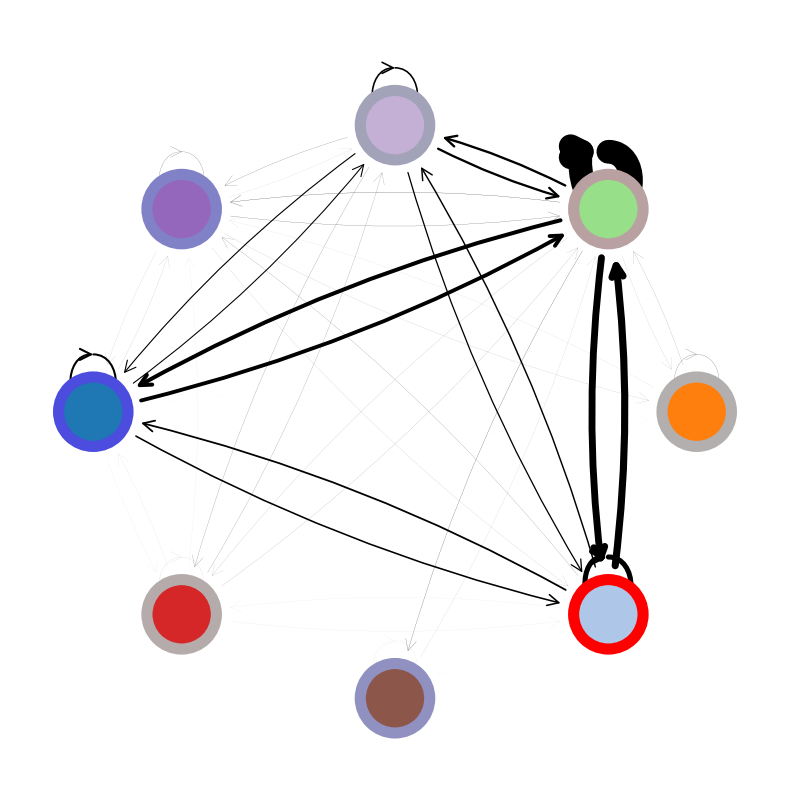

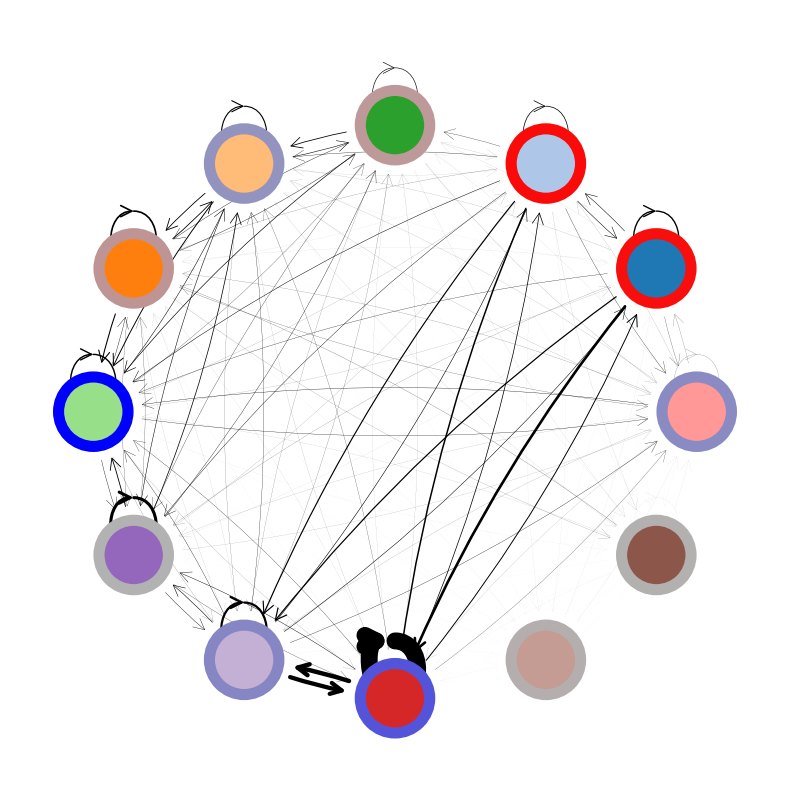

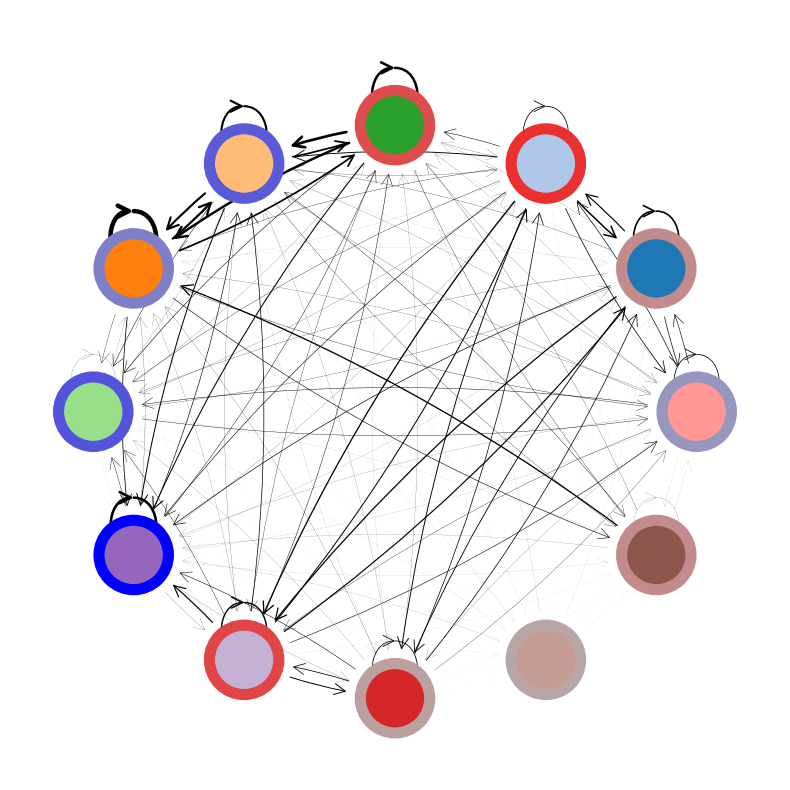

In [7]:
mmcci.plt.network_plot(mmcci.it.calculate_overall_interactions(visium_normalised[1]), show_labels=False, node_size=2500, edge_weight=50, figsize=(8,8), node_colors=colors)
mmcci.plt.network_plot(mmcci.it.calculate_overall_interactions(cosmx_normalised[1]), show_labels=False, node_size=2500, edge_weight=50, figsize=(8,8), node_colors=colors)
mmcci.plt.network_plot(mmcci.it.calculate_overall_interactions(cosmx_normalised[2]), show_labels=False, node_size=2500, edge_weight=50, figsize=(8,8), node_colors=colors)

Integrating LR matrices:  88%|████████▊ | 1171/1326 [00:00<00:00, 5984.02it/s]

Integrating p values: 100%|██████████| 645/645 [00:30<00:00, 21.00it/s]


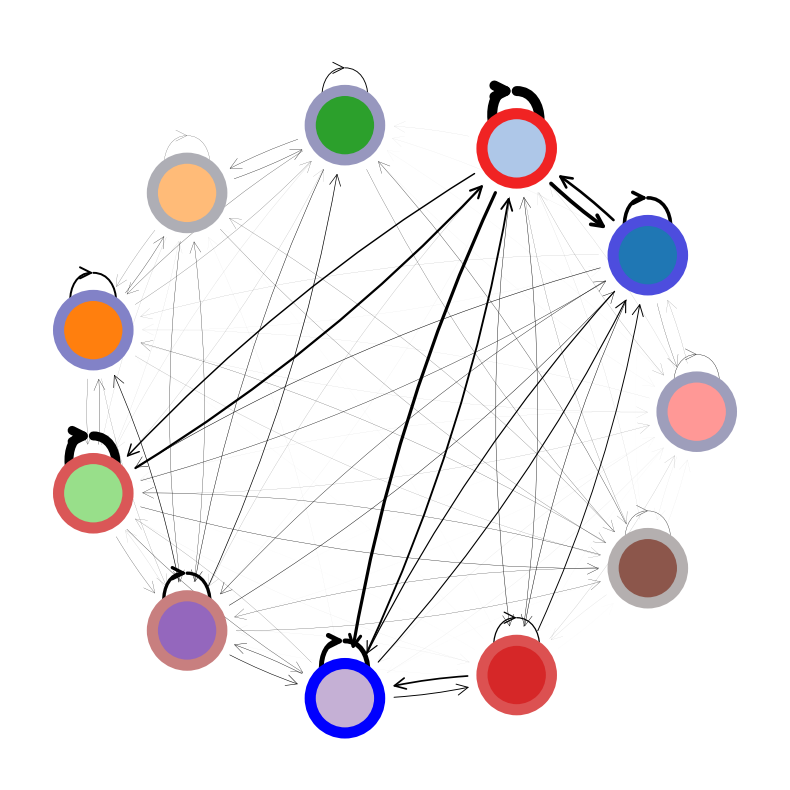

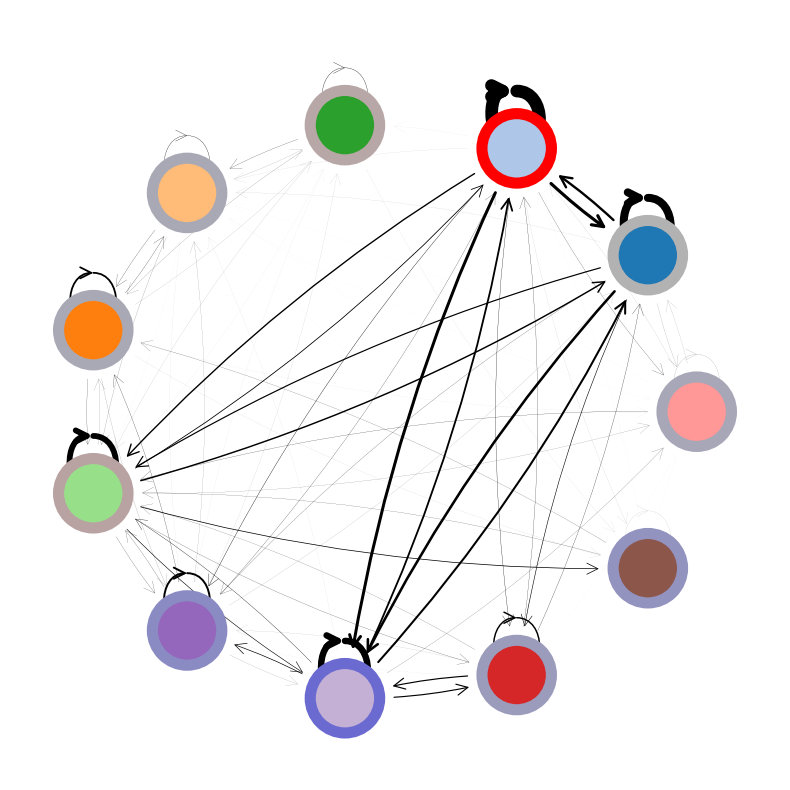

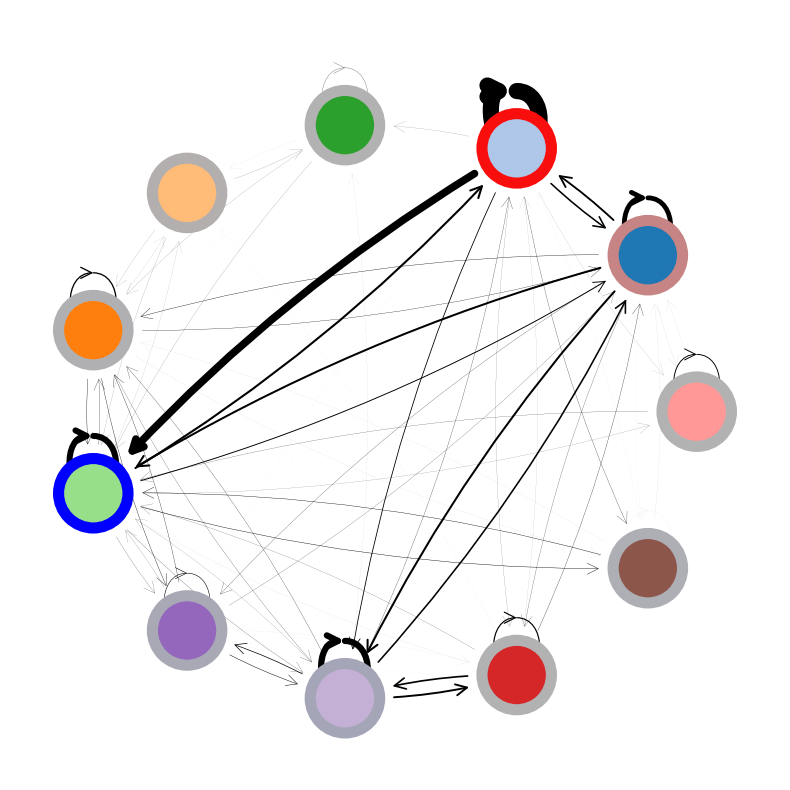

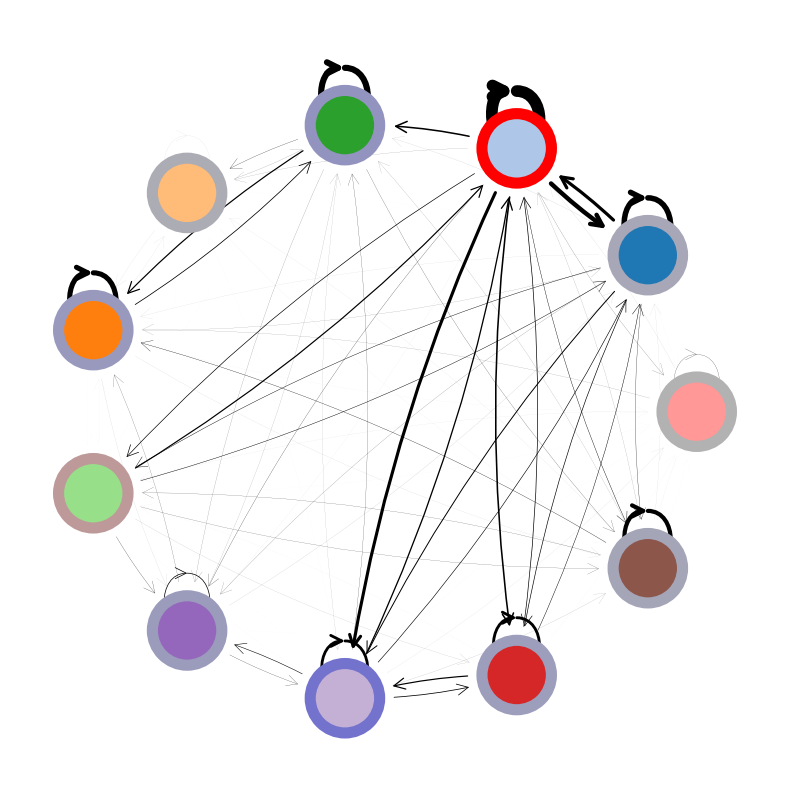

In [8]:
patient_integrated = {}

for patient, samples in patients.items():
    for tech in patients[patient].keys():
        if len(samples[tech]) >= 2:
            samples[tech] = mmcci.it.integrate_samples(samples[tech])
        else:
            samples[tech] = samples[tech][0]
    normalised = mmcci.it.normalise_between_tech([samples['vis'], samples['cos']])
    integrated = mmcci.it.integrate_samples(normalised, method=">=50%")
    patient_integrated[patient] = integrated
    
patient_pvals = {}
for patient, samples in mel_patients_pvals.items():
    sample_list = []
    for tech in mel_patients_pvals[patient].keys():
        sample_list.extend(samples[tech])
    patient_pvals[patient] = mmcci.it.integrate_p_vals(sample_list)
    
mel_patient_integrated_filtered = {}

for patient in patient_integrated.keys():
    mel_patient_integrated_filtered[patient] = mmcci.it.remove_insignificant(patient_integrated[patient], patient_pvals[patient])
    mmcci.plt.network_plot(mmcci.it.calculate_overall_interactions(mel_patient_integrated_filtered[patient]), show_labels=False, node_size=2500, edge_weight=50, figsize=(8,8), node_colors=colors)

#### Integrate within tech

Integrating LR matrices:   5%|▍         | 54/1100 [00:00<00:05, 175.36it/s]

Integrating p values: 100%|██████████| 1425/1425 [00:59<00:00, 24.01it/s]


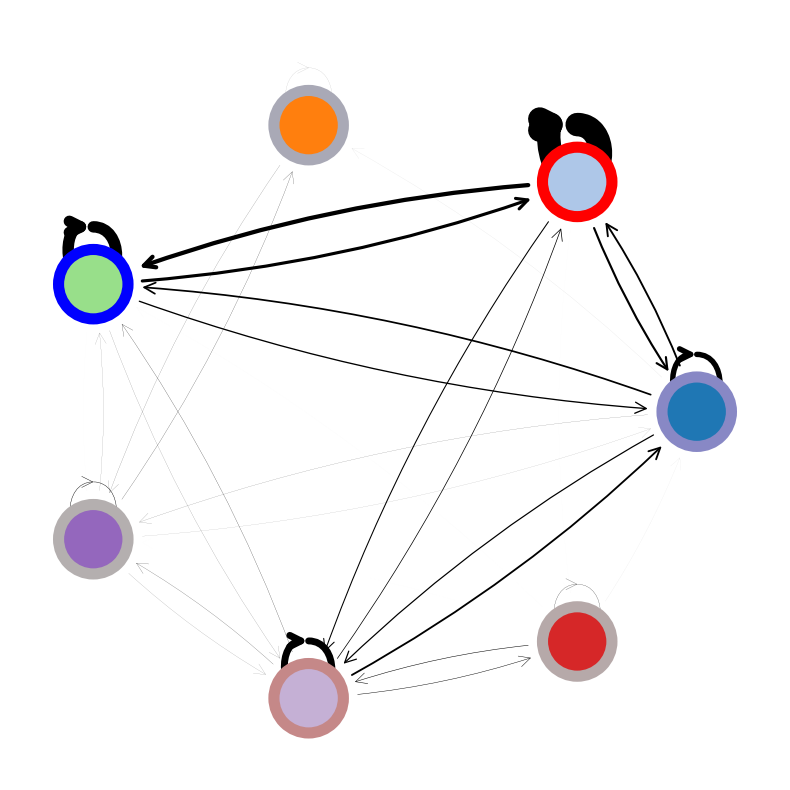

Integrating p values: 100%|██████████| 13/13 [00:00<00:00, 22.11it/s]


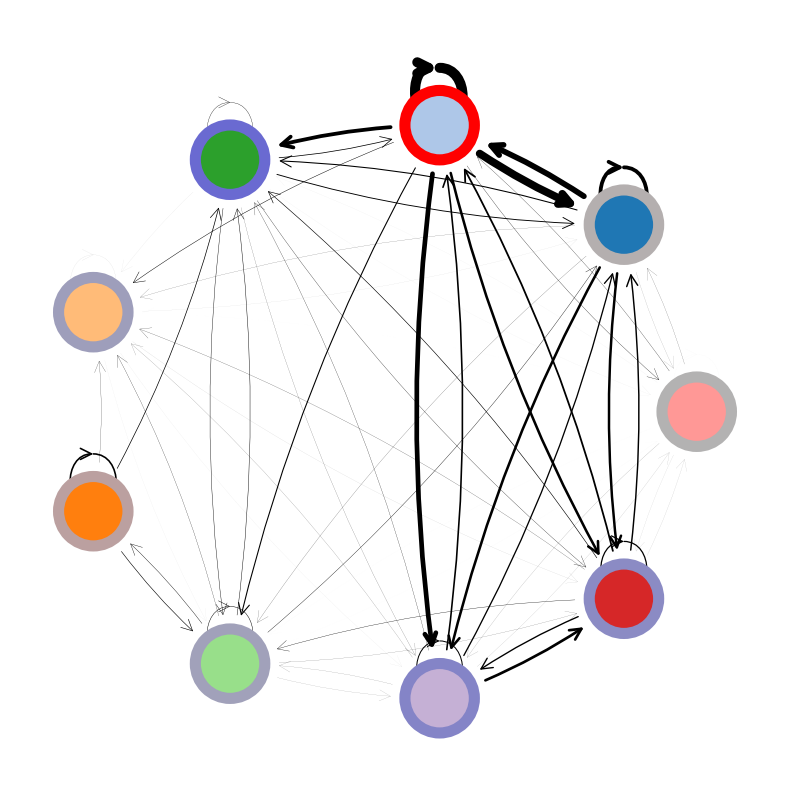

Integrating p values: 100%|██████████| 517/517 [00:30<00:00, 17.13it/s]


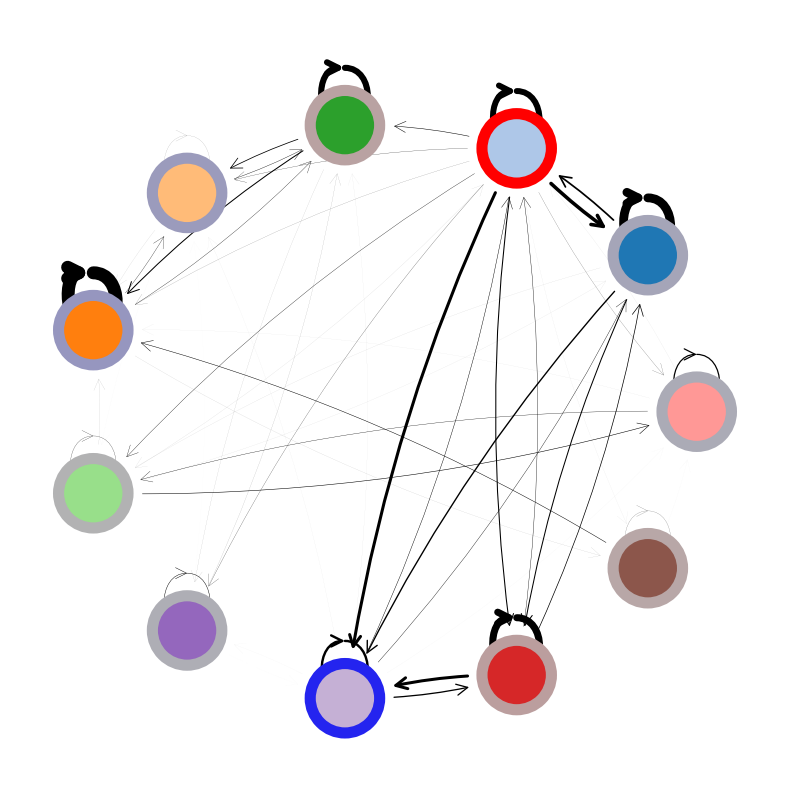

Integrating p values: 100%|██████████| 1540/1540 [01:15<00:00, 20.36it/s]


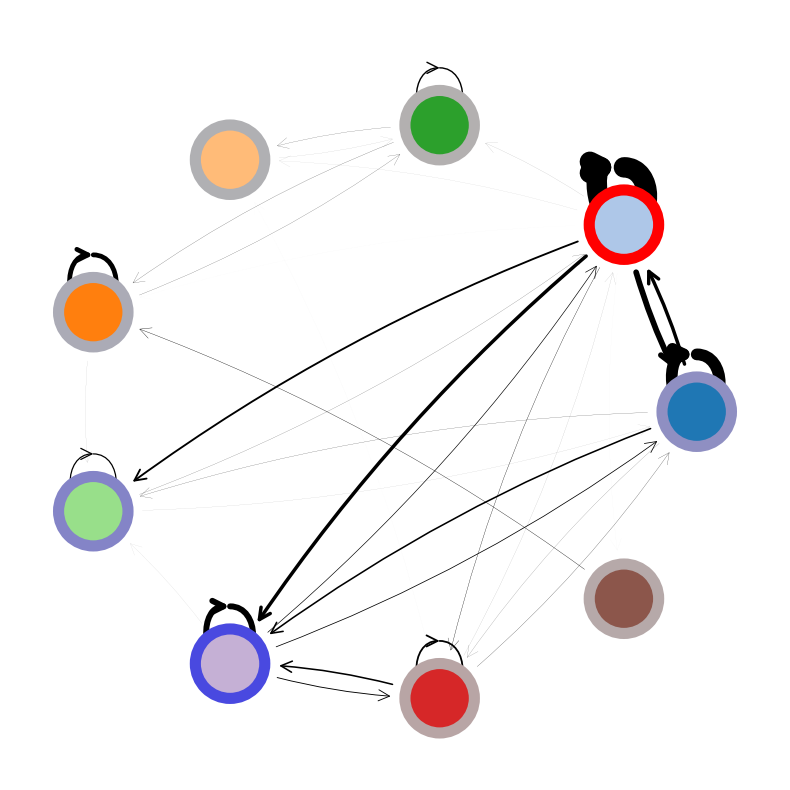

In [9]:
integrated_tech = {}
overall = {}

for tech, samples in zip(['vis', 'xen', 'cos'], [visium_normalised, xenium_normalised, cosmx_normalised]):
    integrated_tech[tech] = mmcci.it.integrate_samples(samples, method=">=50%")
    
    if tech == 'vis':
        p_vals = mmcci.it.integrate_p_vals(visium_pvals)
    elif tech == 'xen':
        p_vals = mmcci.it.integrate_p_vals(xenium_pvals)
    else:
        p_vals = mmcci.it.integrate_p_vals(cosmx_pvals)
        
    integrated = mmcci.it.remove_insignificant(integrated_tech[tech], p_vals)
    overall[tech] = mmcci.it.calculate_overall_interactions(integrated)
    mmcci.plt.network_plot(overall[tech], show_labels=False, node_size=2500, edge_weight=50, figsize=(8,8), node_colors=colors)
    
normalised = mmcci.it.normalise_between_tech(
    [integrated_tech['vis'], integrated_tech['xen'], integrated_tech['cos']]
    )

integrated = mmcci.it.integrate_samples(normalised)
p_vals = mmcci.it.integrate_p_vals(visium_pvals + xenium_pvals + cosmx_pvals)
integrated = mmcci.it.remove_insignificant(integrated, p_vals)
overall = mmcci.it.calculate_overall_interactions(integrated)
mmcci.plt.network_plot(overall, show_labels=False, node_size=2500, edge_weight=50, figsize=(8,8), node_colors=colors)

#### Get LR pairs from Fibroblast to Endothelial

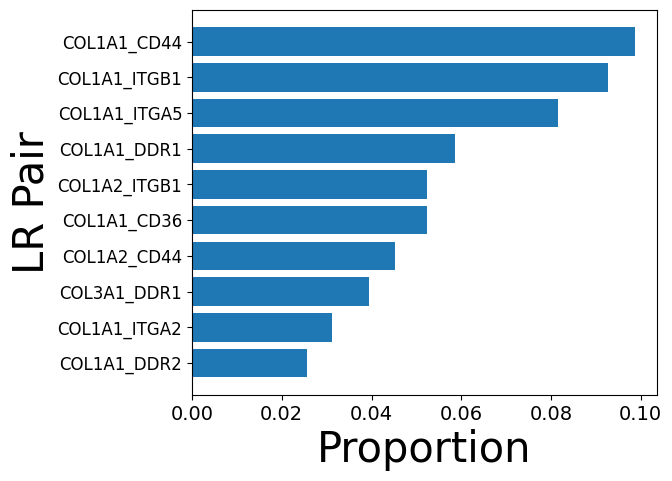

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
0,KEGG_2021_Human,PI3K-Akt signaling pathway,27/354,2.608038e-27,3.833816e-25,0,0,29.411009,1800.283145,ITGB1;CSF1R;CSF1;PDGFB;EFNA5;THBS2;FGF2;EGFR;E...
1,KEGG_2021_Human,Focal adhesion,21/201,4.107720e-24,3.019174e-22,0,0,37.750273,2032.821037,PDGFRB;ITGB1;VWF;ITGA2;CAV1;ITGA1;FN1;PDGFB;TH...
2,KEGG_2021_Human,Proteoglycans in cancer,20/205,2.272338e-22,1.113446e-20,0,0,34.408021,1714.760290,ITGB1;CD63;TGFB1;ITGA2;CAV1;FN1;FGF2;EGFR;DCN;...
3,KEGG_2021_Human,ECM-receptor interaction,15/88,1.006995e-20,3.700707e-19,0,0,60.861787,2802.364609,ITGB1;VWF;ITGA2;ITGA1;FN1;THBS2;COL1A1;COL1A2;...
4,KEGG_2021_Human,Cytokine-cytokine receptor interaction,20/295,3.396482e-19,9.985657e-18,0,0,23.041642,979.877554,ACVRL1;CSF1R;TGFB1;CSF1;TNFSF14;TGFB3;CXCR4;TN...
...,...,...,...,...,...,...,...,...,...,...
179,MSigDB_Hallmark_2020,Androgen Response,1/100,3.375858e-01,3.785053e-01,0,0,2.471505,2.683895,ITGAV
180,MSigDB_Hallmark_2020,Unfolded Protein Response,1/113,3.722159e-01,4.050585e-01,0,0,2.183201,2.157617,CCL2
181,MSigDB_Hallmark_2020,Mitotic Spindle,1/199,5.602979e-01,5.621188e-01,0,0,1.229580,0.712279,NOTCH2
182,MSigDB_Hallmark_2020,mTORC1 Signaling,1/200,5.621188e-01,5.621188e-01,0,0,1.223339,0.704695,CXCR4


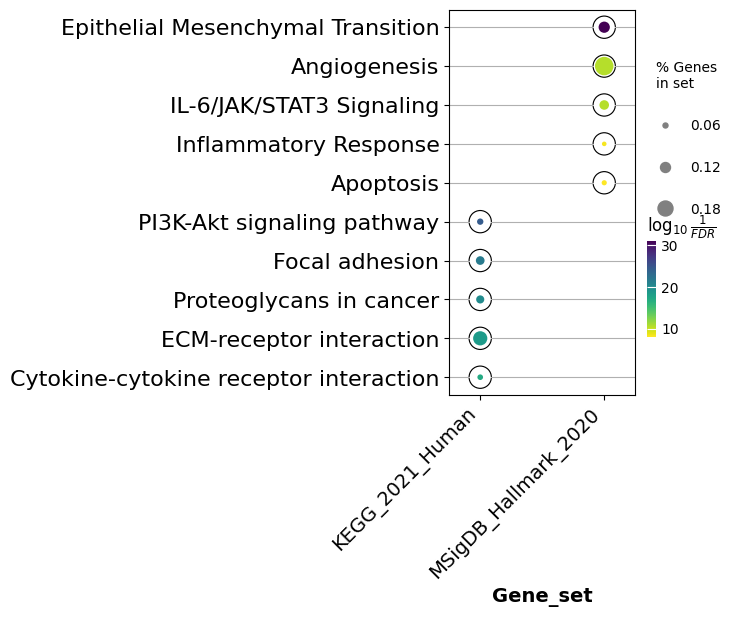

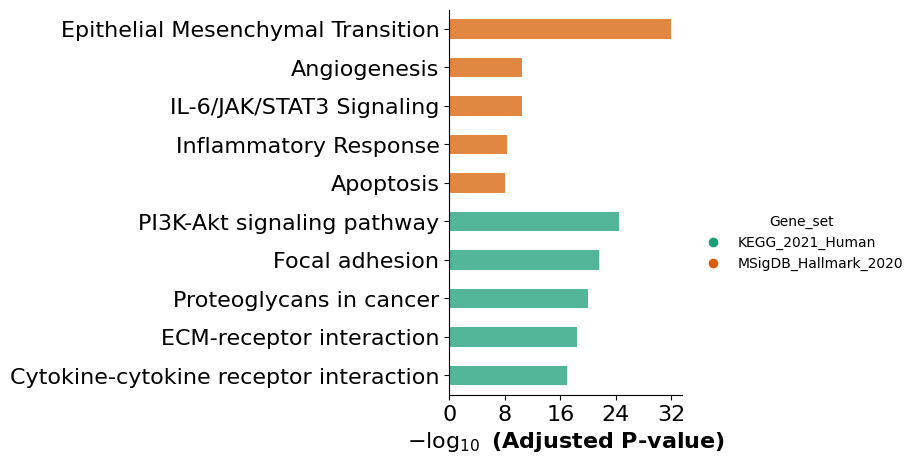

In [10]:
mmcci.plt.lrs_per_celltype(integrated, "Fibroblast", "Endothelial", n=10, x_label_size=30, y_label_size=30)

pairs = mmcci.an.get_lrs_per_celltype(integrated, "Fibroblast", "Endothelial")
mmcci.an.run_gsea(None, lrs=pairs, gene_sets=["KEGG_2021_Human", "MSigDB_Hallmark_2020"])

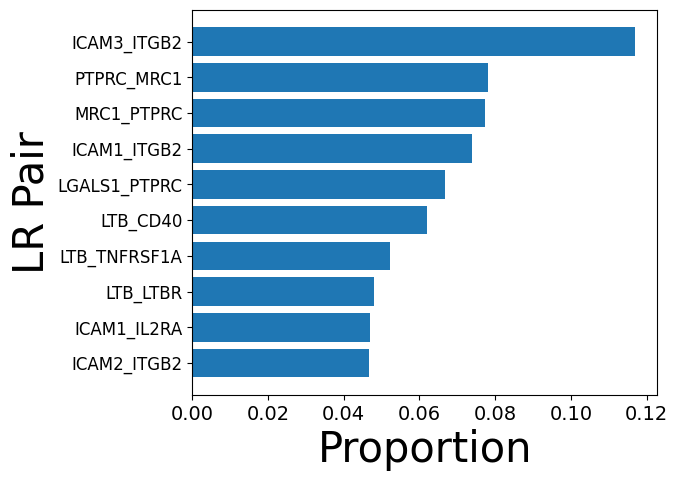

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
0,KEGG_2021_Human,Cytokine-cytokine receptor interaction,16/295,4.028512e-22,4.592503e-20,0,0,80.659498,3973.567180,CCR1;CD40;TGFB1;CXCR4;IL16;TGFBR1;TNFRSF1A;CD4...
1,KEGG_2021_Human,Viral protein interaction with cytokine and cy...,10/100,1.700654e-16,9.693730e-15,0,0,110.444444,4010.276254,CCR1;CXCL12;IL2RA;CCL5;CXCR4;CCR7;LTBR;CCL19;C...
2,KEGG_2021_Human,Cell adhesion molecules,10/148,9.576399e-15,3.639032e-13,0,0,71.855072,2319.443996,ITGB1;CD4;CD40;PTPRC;ITGAM;ITGB2;ICAM2;ICAM3;H...
3,KEGG_2021_Human,Human T-cell leukemia virus 1 infection,10/219,5.003127e-13,1.425891e-11,0,0,47.275120,1338.998885,CD4;CD40;TGFB1;IL2RA;ITGB2;LTBR;TGFBR1;HLA-E;T...
4,KEGG_2021_Human,Intestinal immune network for IgA production,6/48,7.854170e-11,1.790751e-09,0,0,118.619048,2759.955805,CD40;TGFB1;CXCL12;CXCR4;LTBR;CCR10
...,...,...,...,...,...,...,...,...,...,...
133,MSigDB_Hallmark_2020,Xenobiotic Metabolism,1/200,2.604618e-01,2.604618e-01,0,0,3.425923,4.608891,TNFRSF1A
134,MSigDB_Hallmark_2020,p53 Pathway,1/200,2.604618e-01,2.604618e-01,0,0,3.425923,4.608891,TGFB1
135,MSigDB_Hallmark_2020,G2-M Checkpoint,1/200,2.604618e-01,2.604618e-01,0,0,3.425923,4.608891,TGFB1
136,MSigDB_Hallmark_2020,Estrogen Response Early,1/200,2.604618e-01,2.604618e-01,0,0,3.425923,4.608891,CXCL12


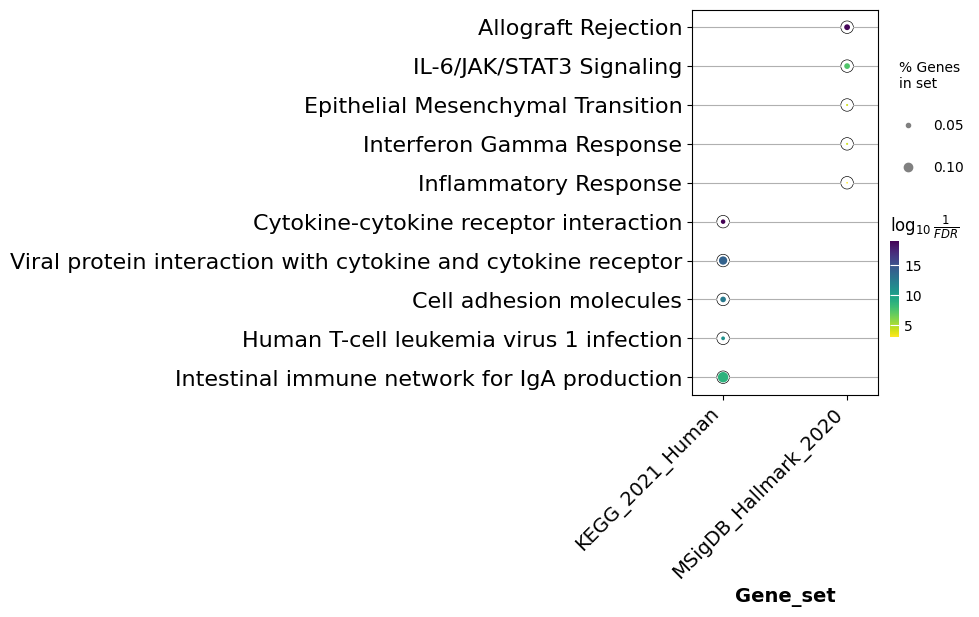

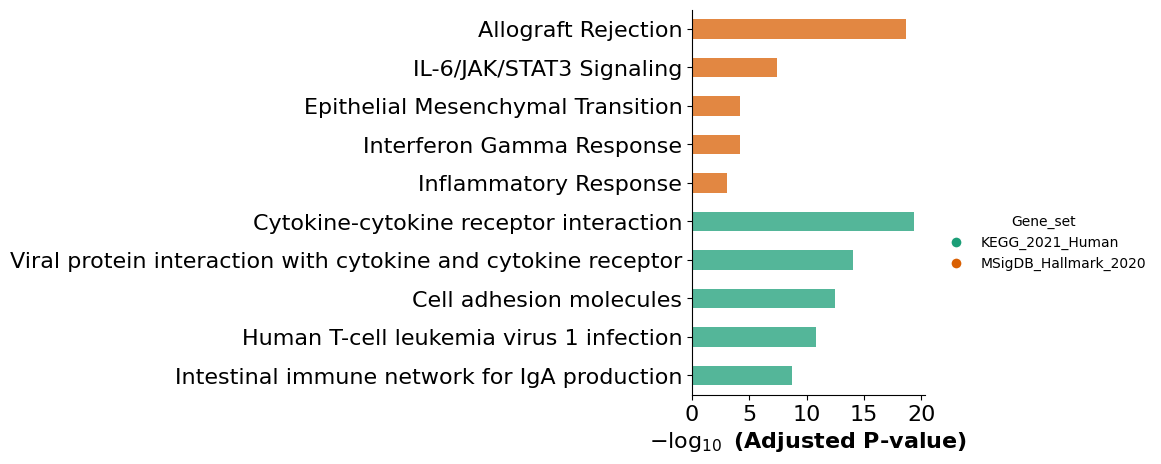

In [11]:
mmcci.plt.lrs_per_celltype(integrated, "NK + T", "Myeloid", n=10, x_label_size=30, y_label_size=30)

pairs = mmcci.an.get_lrs_per_celltype(integrated, "NK + T", "Myeloid")
mmcci.an.run_gsea(None, lrs=pairs, gene_sets=["KEGG_2021_Human", "MSigDB_Hallmark_2020"])

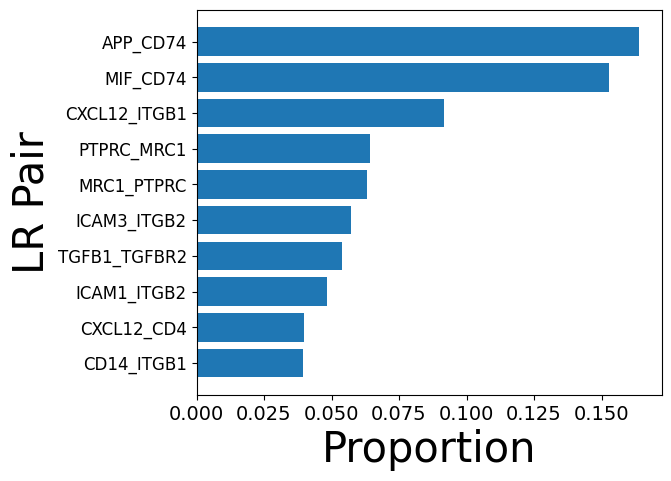

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
0,KEGG_2021_Human,Cytokine-cytokine receptor interaction,10/295,1.804693e-12,1.750552e-10,0,0,43.177632,1167.550394,CSF1R;CD4;TGFB1;CXCL12;CSF1;TNFSF12;CXCR4;CCR7...
1,KEGG_2021_Human,Cell adhesion molecules,7/148,6.158578e-10,2.986910e-08,0,0,51.821948,1099.040143,ITGB1;CD4;PTPRC;ITGB2;ICAM2;ICAM3;ICAM1
2,KEGG_2021_Human,Viral protein interaction with cytokine and cy...,6/100,2.849676e-09,9.213952e-08,0,0,63.446809,1248.383246,CSF1R;CXCL12;CSF1;CXCR4;CCR7;CCL19
3,KEGG_2021_Human,Tuberculosis,6/180,9.690787e-08,2.303376e-06,0,0,34.137931,551.310692,CD74;TGFB1;CD209;ITGB2;MRC1;CD14
4,KEGG_2021_Human,Rheumatoid arthritis,5/93,1.187307e-07,2.303376e-06,0,0,53.804113,857.982319,TGFB1;CXCL12;CSF1;ITGB2;ICAM1
...,...,...,...,...,...,...,...,...,...,...
120,MSigDB_Hallmark_2020,IL-2/STAT5 Signaling,1/199,2.290706e-01,2.300829e-01,0,0,3.995152,5.887754,CSF1
121,MSigDB_Hallmark_2020,G2-M Checkpoint,1/200,2.300829e-01,2.300829e-01,0,0,3.974874,5.840345,TGFB1
122,MSigDB_Hallmark_2020,Estrogen Response Early,1/200,2.300829e-01,2.300829e-01,0,0,3.974874,5.840345,CXCL12
123,MSigDB_Hallmark_2020,Estrogen Response Late,1/200,2.300829e-01,2.300829e-01,0,0,3.974874,5.840345,CXCL12


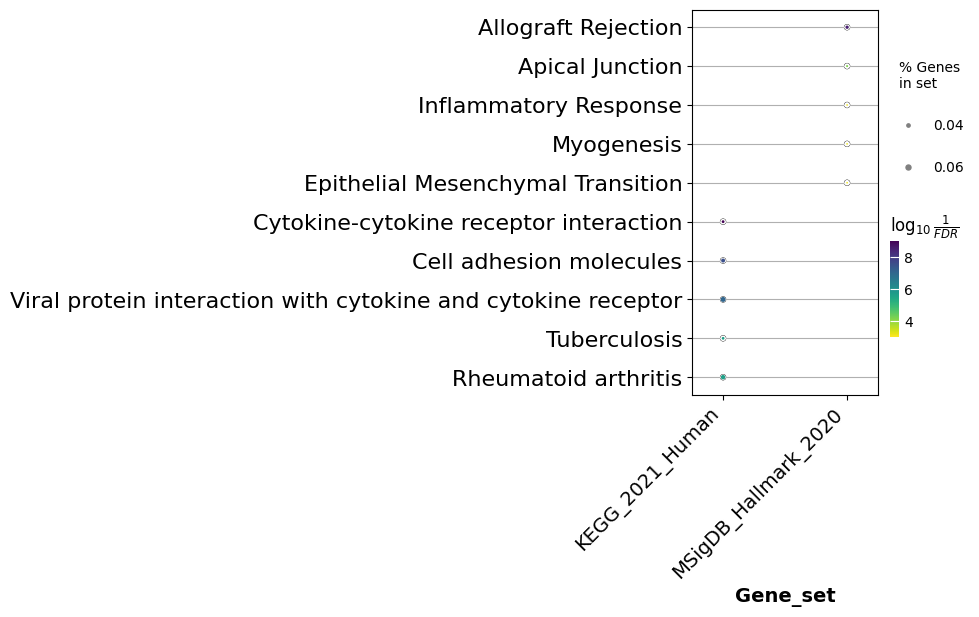

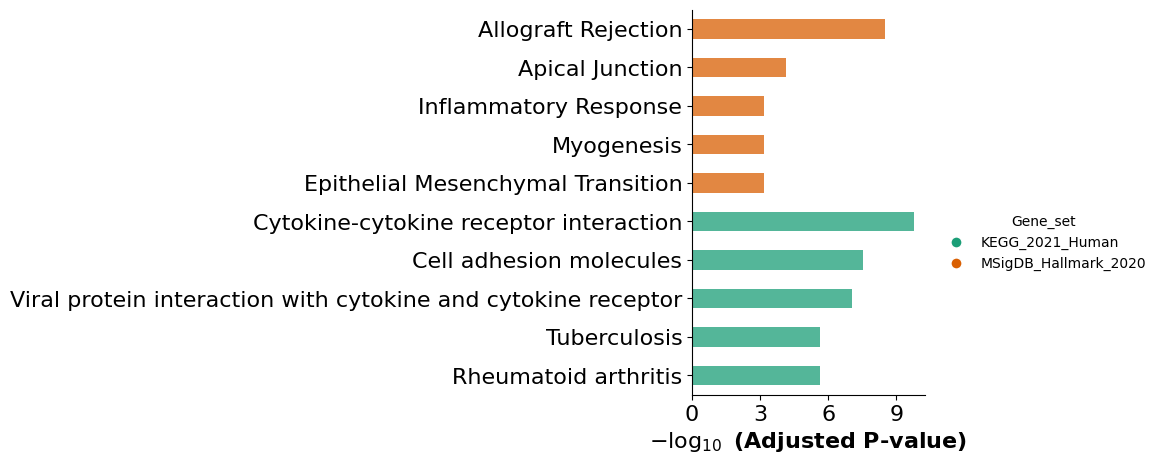

In [12]:
mmcci.plt.lrs_per_celltype(integrated, "Myeloid", "Endothelial", n=10, x_label_size=30, y_label_size=30)

pairs = mmcci.an.get_lrs_per_celltype(integrated, "Myeloid", "Endothelial")
mmcci.an.run_gsea(None, lrs=pairs, gene_sets=["KEGG_2021_Human", "MSigDB_Hallmark_2020"])

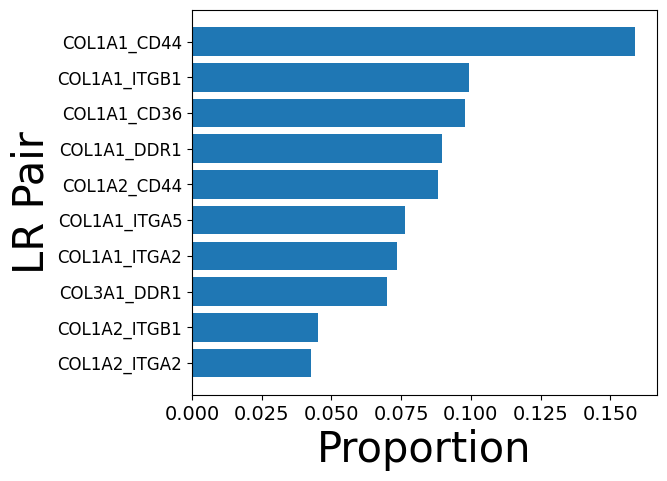

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
0,KEGG_2021_Human,ECM-receptor interaction,11/88,4.239847e-21,4.027854e-19,0,0,258.454545,12124.040650,ITGB1;COL1A1;COL1A2;ITGA2;FN1;ITGA5;CD47;CD36;...
1,KEGG_2021_Human,Proteoglycans in cancer,11/205,6.398469e-17,3.039273e-15,0,0,101.979381,3802.595740,ITGB1;COL1A1;COL1A2;ITGA2;FN1;ITGA5;THBS1;EGFR...
2,KEGG_2021_Human,Focal adhesion,9/201,3.880825e-13,1.228928e-11,0,0,71.343750,2038.830181,ITGB1;COL1A1;COL1A2;ITGA2;FN1;ITGA5;THBS1;EGFR...
3,KEGG_2021_Human,PI3K-Akt signaling pathway,10/354,1.423571e-12,3.380981e-11,0,0,47.562984,1297.416080,ITGB1;COL1A1;COL1A2;ITGA2;FN1;ITGA5;THBS1;EGFR...
4,KEGG_2021_Human,Human papillomavirus infection,9/331,3.439774e-11,6.535570e-10,0,0,42.260870,1018.192412,ITGB1;COL1A1;COL1A2;ITGA2;FN1;ITGA5;THBS1;EGFR...
...,...,...,...,...,...,...,...,...,...,...
115,MSigDB_Hallmark_2020,PI3K/AKT/mTOR Signaling,1/105,1.094044e-01,1.302434e-01,0,0,9.099817,20.135199,EGFR
116,MSigDB_Hallmark_2020,Fatty Acid Metabolism,1/158,1.601918e-01,1.820361e-01,0,0,6.011829,11.009965,CD36
117,MSigDB_Hallmark_2020,IL-2/STAT5 Signaling,1/199,1.975710e-01,1.984626e-01,0,0,4.757095,7.714377,CD44
118,MSigDB_Hallmark_2020,Adipogenesis,1/200,1.984626e-01,1.984626e-01,0,0,4.732950,7.653913,CD36


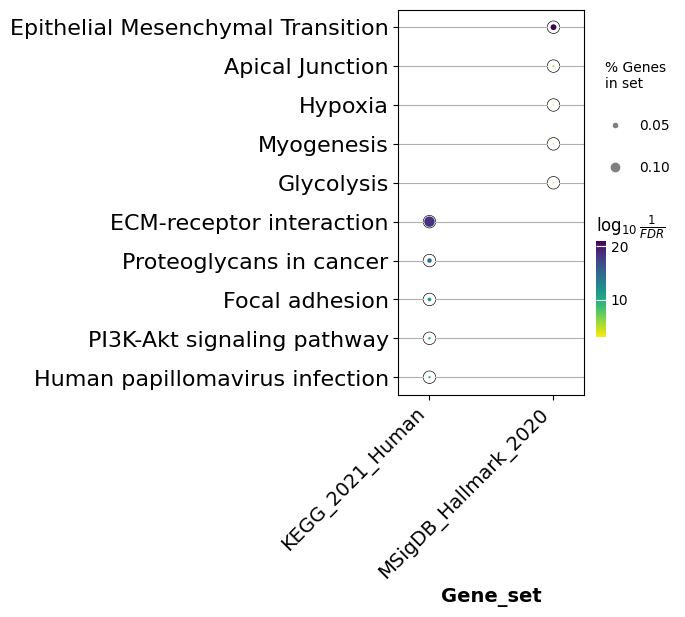

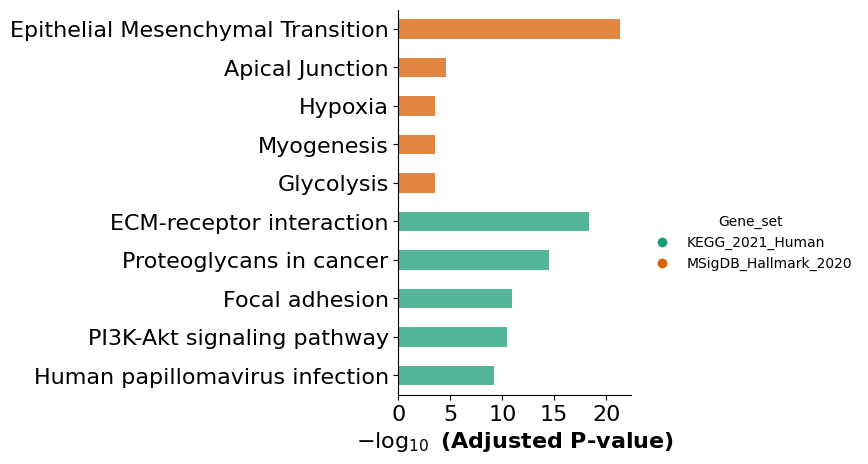

In [13]:
mmcci.plt.lrs_per_celltype(integrated, "Fibroblast", "KC Other", n=10, x_label_size=30, y_label_size=30)

pairs = mmcci.an.get_lrs_per_celltype(integrated, "Fibroblast", "KC Other")
mmcci.an.run_gsea(None, lrs=pairs, gene_sets=["KEGG_2021_Human", "MSigDB_Hallmark_2020"])

#### Find interactions involved in specific pathways

In [14]:
results = mmcci.an.run_gsea(integrated, gene_sets=["KEGG_2021_Human", "MSigDB_Hallmark_2020"], show_plots=False)

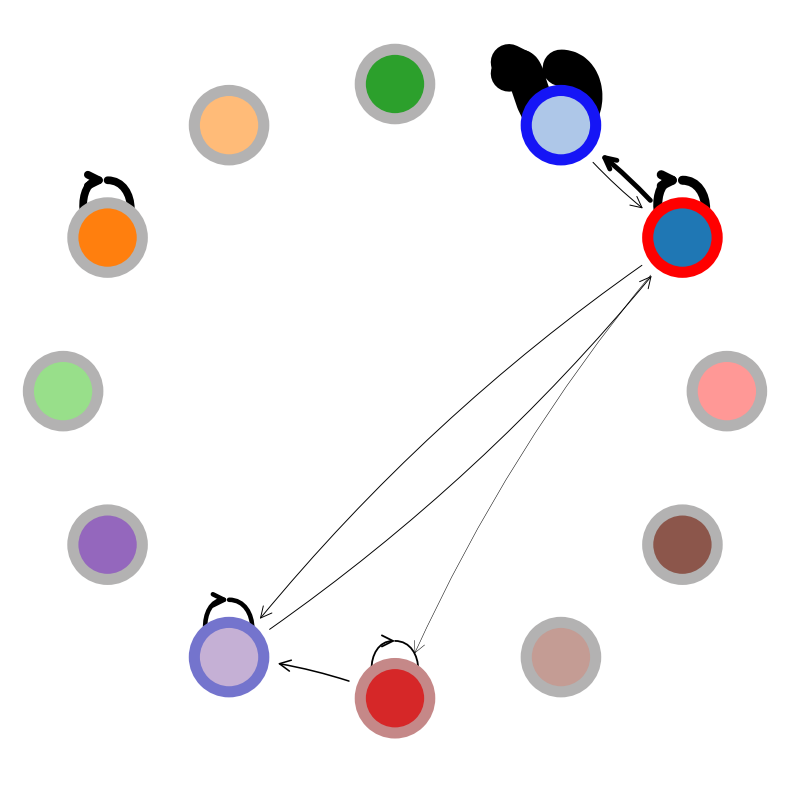

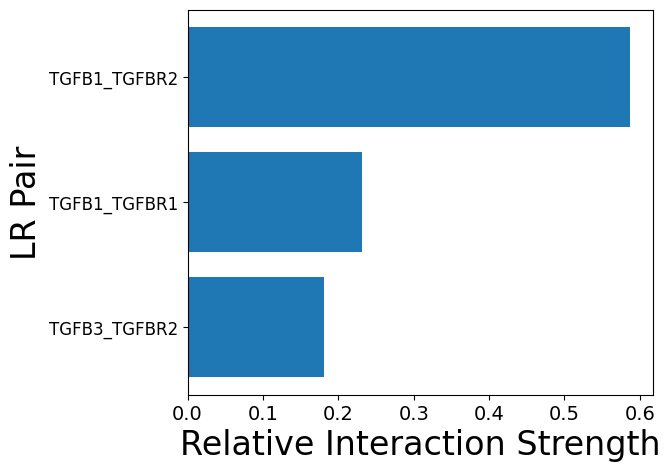

In [15]:
emt_grouped = mmcci.an.pathway_subset(integrated, results, ["TGF-beta signaling pathway"], strict=True)
emt_grouped_overall = mmcci.it.calculate_overall_interactions(emt_grouped)
mmcci.plt.network_plot(emt_grouped_overall, show_labels=False, node_size=2500, edge_weight=50, figsize=(8,8), node_colors=colors, remove_unconnected=False)

mmcci.plt.lr_barplot(emt_grouped, n=3)

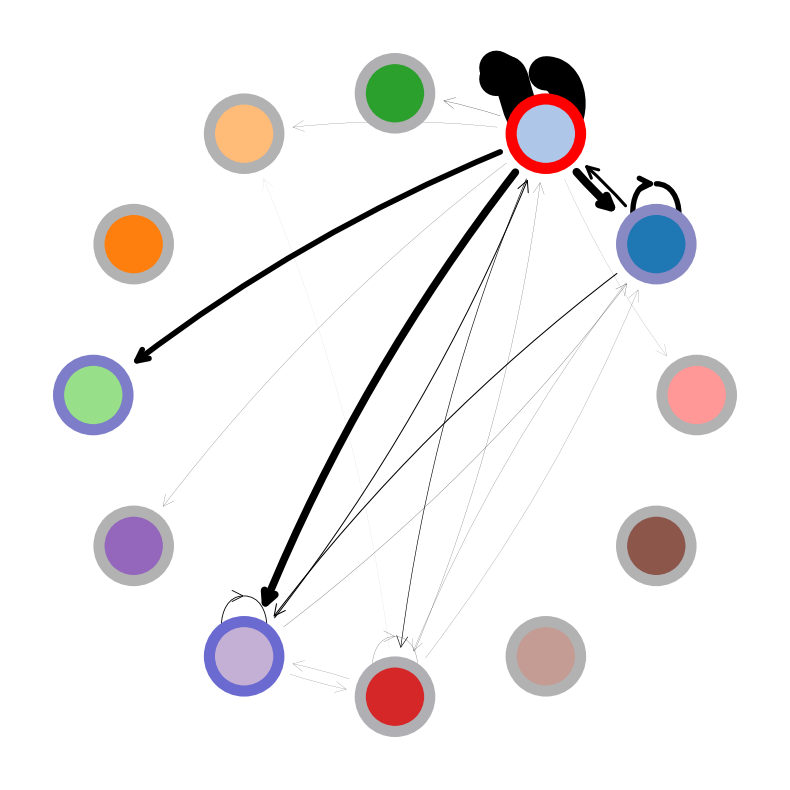

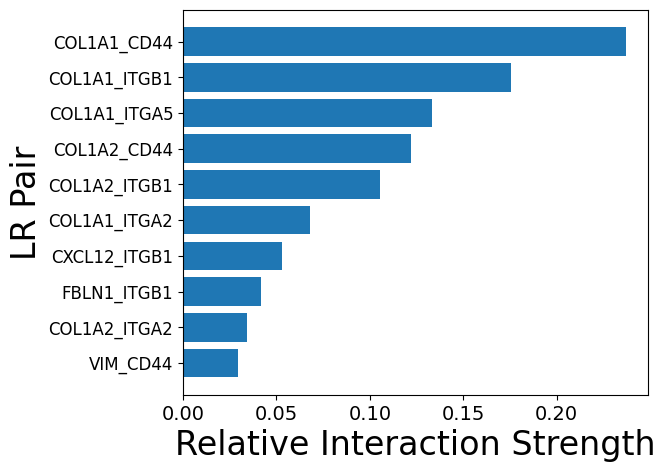

In [16]:
emt_grouped = mmcci.an.pathway_subset(integrated, results, ["Epithelial Mesenchymal Transition"], strict=True)
emt_grouped_overall = mmcci.it.calculate_overall_interactions(emt_grouped)
mmcci.plt.network_plot(emt_grouped_overall, show_labels=False, node_size=2500, edge_weight=50, figsize=(8,8), node_colors=colors, remove_unconnected=False)
mmcci.plt.lr_barplot(emt_grouped, n=10)

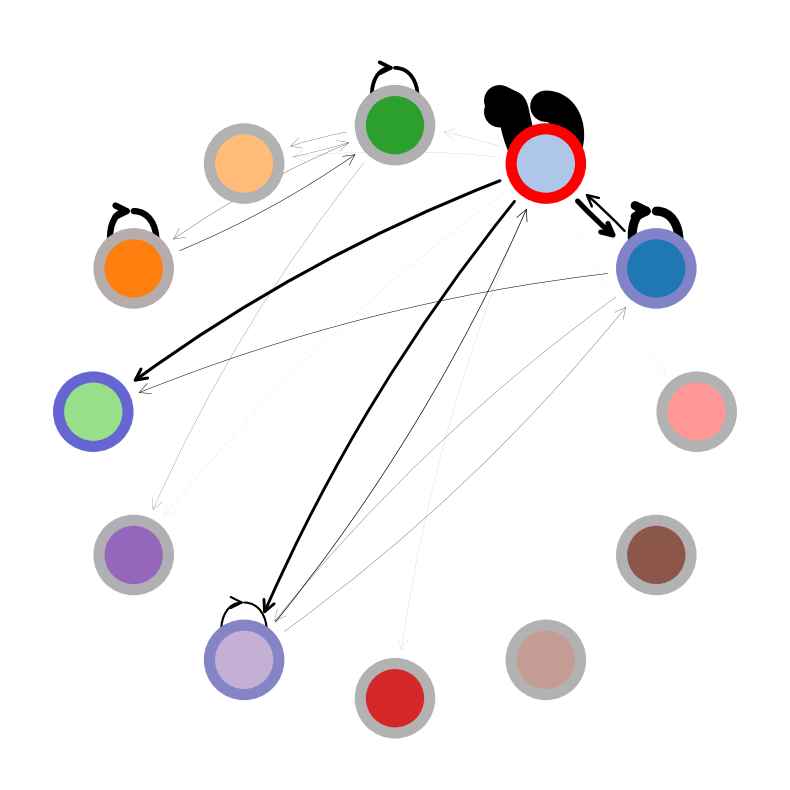

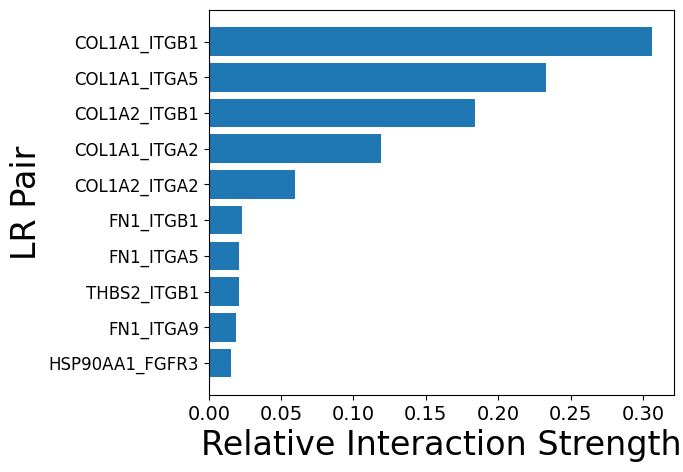

In [17]:
emt_grouped = mmcci.an.pathway_subset(integrated, results, ["PI3K-Akt signaling pathway"], strict=True)
emt_grouped_overall = mmcci.it.calculate_overall_interactions(emt_grouped)
mmcci.plt.network_plot(emt_grouped_overall, show_labels=False, node_size=2500, edge_weight=50, figsize=(8,8), node_colors=colors, remove_unconnected=False)
mmcci.plt.lr_barplot(emt_grouped, n=10)